## VGG NEt

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions
vgg16 = VGG16()
vgg16.summary()

553476096/553467096 [==============================] - 10s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

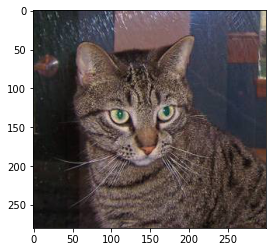

In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('./data/cats_and_dogs_filtered/train/cats/cat.1.jpg')
plt.imshow(img);

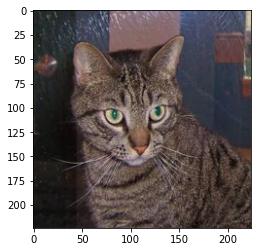

In [7]:
img = img.resize((224,224))
plt.imshow(img);

In [8]:
yhat = vgg16.predict(np.array(img).reshape(1,224,224,3))
label = decode_predictions(yhat)
yhat.shape, label

((1, 1000),
 [[('n02123045', 'tabby', 0.4487506),
   ('n02124075', 'Egyptian_cat', 0.35056183),
   ('n02123159', 'tiger_cat', 0.18960713),
   ('n04589890', 'window_screen', 0.0031938446),
   ('n02127052', 'lynx', 0.0029315325)]])

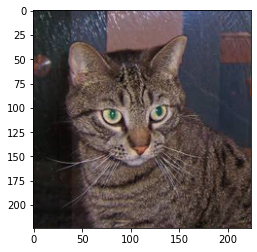

In [10]:
from image_util import center_image
img = Image.open('./data/cats_and_dogs_filtered/train/cats/cat.1.jpg')
img = center_image(img, src_format='Pillow', dst_format='Pillow')
plt.imshow(img);

In [11]:
yhat = vgg16.predict(np.array(img).reshape(1,224,224,3))
label = decode_predictions(yhat)
label

[[('n02123045', 'tabby', 0.5123147),
  ('n02124075', 'Egyptian_cat', 0.29798445),
  ('n02123159', 'tiger_cat', 0.17765215),
  ('n02127052', 'lynx', 0.0032595897),
  ('n04589890', 'window_screen', 0.0029013793)]]

## Res Net

In [13]:
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions
resnet50 = ResNet50()
resnet50.summary()

102981632/102967424 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

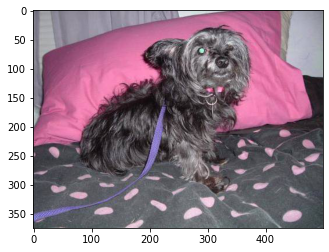

In [15]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('./data/cats_and_dogs_filtered/train/dogs/dog.0.jpg')
plt.imshow(img);

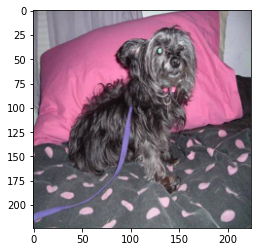

In [16]:
img = img.resize((224,224))
plt.imshow(img);

In [17]:
yhat = resnet50.predict(np.array(img).reshape(1,224,224,3))
label = decode_predictions(yhat)
yhat.shape, label

((1, 1000),
 [[('n02088094', 'Afghan_hound', 0.5898753),
   ('n02102318', 'cocker_spaniel', 0.16181089),
   ('n02101006', 'Gordon_setter', 0.04405695),
   ('n02110627', 'affenpinscher', 0.021172328),
   ('n02102480', 'Sussex_spaniel', 0.021087268)]])

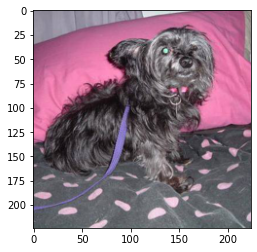

In [18]:
from image_util import center_image
img = Image.open('./data/cats_and_dogs_filtered/train/dogs/dog.0.jpg')
img = center_image(img, src_format='Pillow', dst_format='Pillow')
plt.imshow(img);

In [19]:
yhat = resnet50.predict(np.array(img).reshape(1,224,224,3))
label = decode_predictions(yhat)
label

[[('n02110627', 'affenpinscher', 0.6181504),
  ('n02094433', 'Yorkshire_terrier', 0.089897685),
  ('n02097209', 'standard_schnauzer', 0.06954987),
  ('n02102318', 'cocker_spaniel', 0.035029653),
  ('n02097130', 'giant_schnauzer', 0.03159108)]]

## Ensemble

In [21]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet import ResNet101

vgg16 = VGG16()
vgg19 = VGG19()
resnet50 = ResNet50()
resnet101 = ResNet101()

179658752/179648224 [==============================] - 5s 0us/step


In [43]:
import numpy as np 
from PIL import Image
from glob import glob
from image_util import center_image

lines = []
for fname in glob('./data/animals/*.jpg'):
    name = fname.split('/')[2].split('\\')[1].split('.')[0]
    img = center_image(Image.open(fname), src_format='Pillow')
    yhat_v16 = vgg16.predict(img.reshape(1,224,224,3))
    yhat_v19 = vgg19.predict(img.reshape(1,224,224,3))
    yhat_r50 = resnet50.predict(img.reshape(1,224,224,3))
    yhat_r101 = resnet101.predict(img.reshape(1,224,224,3))
    yhat_ens = (yhat_v16 + yhat_v19 + yhat_r50 + yhat_r101) / 4

    pred_v16 = decode_predictions(yhat_v16)[0][0][1]
    pred_v19 = decode_predictions(yhat_v19)[0][0][1]
    pred_r50 = decode_predictions(yhat_r50)[0][0][1]
    pred_r101 = decode_predictions(yhat_r101)[0][0][1]
    pred_ens = decode_predictions(yhat_ens)[0][0][1]

    lines.append([name, pred_v16, pred_v19, pred_r50, pred_r101, pred_ens])

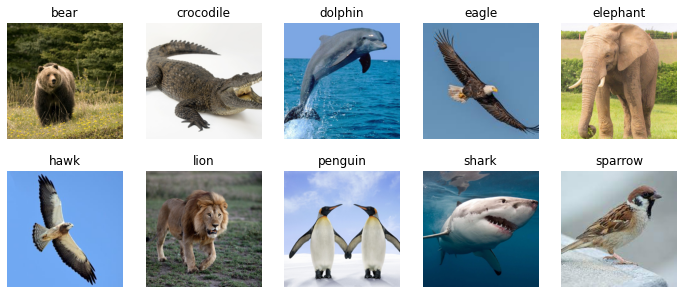

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
for i, fname in enumerate(glob('./data/animals/*.jpg')):
    plt.subplot(2,5,i+1)
    plt.imshow(center_image(Image.open(fname), src_format='Pillow', dst_format='Pillow'))
    plt.title(fname.split('/')[2].split('\\')[1].split('.')[0])
    plt.axis('off')
plt.show()

In [44]:
df = pd.DataFrame(lines, columns=['Name','VGG16','VGG19','ResNet50','ResNet101','Ensemble'])
df

,Name,VGG16,VGG19,ResNet50,ResNet101,Ensemble
0,bear,brown_bear,ice_bear,ice_bear,brown_bear,ice_bear
1,crocodile,agama,American_alligator,American_alligator,American_alligator,American_alligator
2,dolphin,dugong,hammerhead,hammerhead,hammerhead,hammerhead
3,eagle,kite,kite,kite,kite,kite
4,elephant,African_elephant,African_elephant,African_elephant,African_elephant,African_elephant
5,hawk,kite,kite,screw,kite,kite
6,lion,lion,lion,lion,lion,lion
7,penguin,king_penguin,king_penguin,king_penguin,king_penguin,king_penguin
8,shark,great_white_shark,great_white_shark,great_white_shark,great_white_shark,great_white_shark
9,sparrow,quail,jay,chickadee,jay,jay
